In [2]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram,DroughtDetection
import pandas as pd
import numpy as np
import re

In [3]:
df = pd.read_csv('UpdatedCounties.csv')

# Clean function
def clean_coord(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    val = re.sub(r'[–—−]', '-', val)  # replace Unicode dashes with -
    val = val.replace('°', '')        # remove degree symbol
    try:
        return float(val)
    except ValueError:
        return np.nan

# Apply to both columns
df['lat'] = df['lat'].apply(clean_coord)
df['lon'] = df['lon'].apply(clean_coord)
df = df.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'])
locations = df[['state', 'county', 'lat', 'lon']].to_dict(orient='records')

all_onsets = []

for loc in locations:
    state = loc['state']
    county = loc['county']
    lat = loc['lat']
    lon = loc['lon']    
    
    # Create the drought detection object for PET — adjust if using VWC or precip
    pet4 = DroughtDetection(lat=lat, lon=lon, rolling_column='pet', weeks=4, residual_column='pet')
    precip4 = DroughtDetection(lat=lat, lon=lon, rolling_column = 'precip',weeks = 4, residual_column=None)
    vwc = DroughtDetection(lat=lat, lon=lon, rolling_column = 'vwc',weeks = 1, residual_column=None)
    # Get the four-week onset events
    onset_df_pet4 = pet4.four_week_onset(column='pet 4 rolling Residuals', functions=['pearson'])
    onset_df_precip4 = precip4.four_week_onset(column='precip 4 rolling', functions=['pearson'])
    onset_df_vwc = vwc.four_week_onset(column='vwc 1 rolling', functions=['normal'])



    # Append PET
    if not onset_df_pet4.empty:
        onset_df_pet4 = onset_df_pet4.copy()
        onset_df_pet4['State'] = state
        onset_df_pet4['County'] = county
        onset_df_pet4['lat'] = lat
        onset_df_pet4['lon'] = lon
        onset_df_pet4['source'] = 'pet'
        all_onsets.append(onset_df_pet4)

    # Append Precip
    if not onset_df_precip4.empty:
        onset_df_precip4 = onset_df_precip4.copy()
        onset_df_precip4['State'] = state
        onset_df_precip4['County'] = county
        onset_df_precip4['lat'] = lat
        onset_df_precip4['lon'] = lon
        onset_df_precip4['source'] = 'precip'
        all_onsets.append(onset_df_precip4)

    # Append VWC
    if not onset_df_vwc.empty:
        onset_df_vwc = onset_df_vwc.copy()
        onset_df_vwc['State'] = state
        onset_df_vwc['County'] = county
        onset_df_vwc['lat'] = lat
        onset_df_vwc['lon'] = lon
        onset_df_vwc['source'] = 'vwc'
        all_onsets.append(onset_df_vwc)

# Combine all into one DataFrame
final_onset_df_4wk = pd.concat(all_onsets, ignore_index=True)
final_onset_df_4wk

,onset_date,end_date,onset pet 4 rolling Residuals category,end pet 4 rolling Residuals category,onset pet 4 rolling Residuals,end pet 4 rolling Residuals,function,State,County,lat,lon,source,onset precip 4 rolling category,end precip 4 rolling category,onset precip 4 rolling,end precip 4 rolling,onset vwc 1 rolling category,end vwc 1 rolling category,onset vwc 1 rolling,end vwc 1 rolling
0,2010-04-20,2010-05-18,0.0,2.0,-0.779777,-1.584294,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-06-22,2010-07-20,0.0,3.0,-0.541211,-1.981516,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-03,2012-05-01,0.0,2.0,-0.535599,-1.334091,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-11,2015-09-08,1.0,4.0,-0.988744,-2.086742,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-08-09,2016-09-06,1.0,3.0,-1.226620,-2.029544,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,2014-04-01,2014-04-29,NaN,NaN,NaN,NaN,normal,WV,Wyoming,37.603717,-81.548884,vwc,NaN,NaN,NaN,NaN,0.0,3.0,-0.833884,-2.024149
8068,2016-08-09,2016-09-06,NaN,NaN,NaN,NaN,normal,WV,Wyoming,37.603717,-81.548884,vwc,NaN,NaN,NaN,NaN,0.0,2.0,-0.810896,-1.346723
8069,2016-08-23,2016-09-20,NaN,NaN,NaN,NaN,normal,WV,Wyoming,37.603717,-81.548884,vwc,NaN,NaN,NaN,NaN,0.0,2.0,-0.529612,-1.346723
8070,2021-03-23,2021-04-27,NaN,NaN,NaN,NaN,normal,WV,Wyoming,37.603717,-81.548884,vwc,NaN,NaN,NaN,NaN,0.0,3.0,-0.833884,-1.854111


In [31]:
all_counties = df[['State', 'County']].drop_duplicates()

In [15]:
all_onsets = []

for loc in locations:
    state = loc['state']
    county = loc['county']
    lat = loc['lat']
    lon = loc['lon']    
    
    # Create the drought detection object for PET — adjust if using VWC or precip
    pet4 = DroughtDetection(lat=lat, lon=lon, rolling_column='pet', weeks=4, residual_column='pet')
    precip4 = DroughtDetection(lat=lat, lon=lon, rolling_column = 'precip',weeks = 4, residual_column=None)
    vwc = DroughtDetection(lat=lat, lon=lon, rolling_column = 'vwc',weeks = 1, residual_column=None)
    # Get the four-week onset events
    onset_df_pet4 = pet4.two_week_onset(column='pet 4 rolling Residuals', functions=['pearson'])
    onset_df_precip4 = precip4.two_week_onset(column='precip 4 rolling', functions=['pearson'])
    onset_df_vwc = vwc.two_week_onset(column='vwc 1 rolling', functions=['normal'])



    # Append PET
    if not onset_df_pet4.empty:
        onset_df_pet4 = onset_df_pet4.copy()
        onset_df_pet4['State'] = state
        onset_df_pet4['County'] = county
        onset_df_pet4['lat'] = lat
        onset_df_pet4['lon'] = lon
        onset_df_pet4['source'] = 'pet'
        all_onsets.append(onset_df_pet4)

    # Append Precip
    if not onset_df_precip4.empty:
        onset_df_precip4 = onset_df_precip4.copy()
        onset_df_precip4['State'] = state
        onset_df_precip4['County'] = county
        onset_df_precip4['lat'] = lat
        onset_df_precip4['lon'] = lon
        onset_df_precip4['source'] = 'precip'
        all_onsets.append(onset_df_precip4)

    # Append VWC
    if not onset_df_vwc.empty:
        onset_df_vwc = onset_df_vwc.copy()
        onset_df_vwc['State'] = state
        onset_df_vwc['County'] = county
        onset_df_vwc['lat'] = lat
        onset_df_vwc['lon'] = lon
        onset_df_vwc['source'] = 'vwc'
        all_onsets.append(onset_df_vwc)

# Combine all into one DataFrame
final_onset_df_2wk = pd.concat(all_onsets, ignore_index=True)

In [7]:
final_onset_df_4wk

,onset_date,end_date,onset pet 4 rolling Residuals category,end pet 4 rolling Residuals category,onset pet 4 rolling Residuals,end pet 4 rolling Residuals,function,State,County,lat,lon,source,onset precip 4 rolling category,end precip 4 rolling category,onset precip 4 rolling,end precip 4 rolling,onset vwc 1 rolling category,end vwc 1 rolling category,onset vwc 1 rolling,end vwc 1 rolling
0,2002-06-18,2002-07-16,3.0,6.0,0.426214,-2.581470,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-09-03,2002-10-01,3.0,5.0,0.501554,-1.674714,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-22,2005-04-26,1.0,5.0,1.589798,-1.612954,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-08-23,2005-10-04,3.0,6.0,-0.390050,-2.580262,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-04-11,2006-05-09,3.0,5.0,-0.286871,-1.688209,pearson,CT,Fairfield,41.228103,-73.366757,pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23036,2021-03-30,2021-04-27,NaN,NaN,NaN,NaN,normal,WV,Wyoming,37.603717,-81.548884,vwc,NaN,NaN,NaN,NaN,3.0,5.0,-0.842594,-1.861678
23037,2022-04-26,2022-05-24,NaN,NaN,NaN,NaN,normal,WV,Wyoming,37.603717,-81.548884,vwc,NaN,NaN,NaN,NaN,3.0,5.0,0.581774,-1.610502
23038,2023-03-28,2023-04-25,NaN,NaN,NaN,NaN,normal,WV,Wyoming,37.603717,-81.548884,vwc,NaN,NaN,NaN,NaN,3.0,6.0,-0.345524,-2.036211
23039,2023-09-05,2023-10-10,NaN,NaN,NaN,NaN,normal,WV,Wyoming,37.603717,-81.548884,vwc,NaN,NaN,NaN,NaN,1.0,5.0,1.941556,-1.502854


In [3]:
from datetime import datetime, timedelta

final_onset_df_4wk['onset_date'] = pd.to_datetime(final_onset_df_4wk['onset_date'])
multi_source_onsets = []
grouped = final_onset_df_4wk.groupby(['State', 'County', 'lat', 'lon'])

for (state, county, lat, lon), group in grouped:
    group = group.copy()

    for i, row in group.iterrows():
        current_date = row['onset_date']
        source = row['source']

        window_start = current_date - timedelta(weeks=2)
        window_end = current_date + timedelta(weeks=2)

        matches = group[(group['onset_date'] >= window_start) &
                        (group['onset_date'] <= window_end)]

        matched_sources = matches['source'].unique()

        if len(matched_sources) >= 2:
            avg_onset = matches['onset_date'].mean()
            multi_source_onsets.append({
                'State': state,
                'County': county,
                'lat': lat,
                'lon': lon,
                'avg_onset_date': avg_onset,
                'sources': list(matched_sources),
                'num_sources': len(matched_sources),
                'month': avg_onset.strftime('%B')
            })

df_4wk_onset_combined = pd.DataFrame(multi_source_onsets).drop_duplicates(subset=['State', 'County', 'lat', 'lon', 'avg_onset_date'])

NameError: name 'final_onset_df_4wk' is not defined

In [17]:
df_4wk_onset_combined


,State,County,lat,lon,avg_onset_date,sources,num_sources,month
0,CT,Fairfield,41.228103,-73.366757,2010-04-27 00:00:00,"[pet, precip]",2,April
1,CT,Fairfield,41.228103,-73.366757,2010-06-18 12:00:00,"[pet, precip]",2,June
2,CT,Fairfield,41.228103,-73.366757,2012-03-30 12:00:00,"[pet, vwc]",2,March
3,CT,Fairfield,41.228103,-73.366757,2015-08-11 00:00:00,[pet],1,August
4,CT,Fairfield,41.228103,-73.366757,2016-08-09 00:00:00,[pet],1,August
...,...,...,...,...,...,...,...,...
8062,WV,Wyoming,37.603717,-81.548884,2007-04-10 00:00:00,[vwc],1,April
8065,WV,Wyoming,37.603717,-81.548884,2008-09-02 00:00:00,[vwc],1,September
8066,WV,Wyoming,37.603717,-81.548884,2012-06-05 00:00:00,[vwc],1,June
8070,WV,Wyoming,37.603717,-81.548884,2021-03-23 00:00:00,[vwc],1,March


In [55]:
final_onset_df_2wk['onset_date'] = pd.to_datetime(final_onset_df_2wk['onset_date'])
multi_source_onsets = []
grouped = final_onset_df_2wk.groupby(['State', 'County', 'lat', 'lon'])

for (state, county, lat, lon), group in grouped:
    group = group.copy()

    for i, row in group.iterrows():
        current_date = row['onset_date']
        source = row['source']

        window_start = current_date - timedelta(weeks=2)
        window_end = current_date + timedelta(weeks=2)

        matches = group[(group['onset_date'] >= window_start) &
                        (group['onset_date'] <= window_end)]

        matched_sources = matches['source'].unique()

        if len(matched_sources) >= 2:
            avg_onset = matches['onset_date'].mean()
            multi_source_onsets.append({
                'State': state,
                'County': county,
                'lat': lat,
                'lon': lon,
                'avg_onset_date': avg_onset,
                'sources': list(matched_sources),
                'num_sources': len(matched_sources),
                'month': avg_onset.strftime('%B')
            })

df_2wk_onset_combined = pd.DataFrame(multi_source_onsets).drop_duplicates(subset=['State', 'County', 'lat', 'lon', 'avg_onset_date'])

In [112]:
df_2wk_onset_combined

,State,County,lat,lon,avg_onset_date,sources,num_sources,month
0,CT,Fairfield,41.228103,-73.366757,2002-09-17 00:00:00,"[pet, vwc]",2,September
1,CT,Fairfield,41.228103,-73.366757,2005-04-05 00:00:00,"[pet, vwc]",2,April
2,CT,Fairfield,41.228103,-73.366757,2007-05-04 12:00:00,"[pet, vwc]",2,May
3,CT,Fairfield,41.228103,-73.366757,2010-04-02 12:00:00,"[pet, vwc]",2,April
4,CT,Fairfield,41.228103,-73.366757,2010-06-22 00:00:00,"[pet, precip]",2,June
...,...,...,...,...,...,...,...,...
11594,WV,Wyoming,37.603717,-81.548884,2023-09-29 12:00:00,"[precip, vwc]",2,September
11596,WV,Wyoming,37.603717,-81.548884,2024-08-16 12:00:00,"[pet, precip]",2,August
11597,WV,Wyoming,37.603717,-81.548884,2024-08-27 00:00:00,"[pet, precip]",2,August
11598,WV,Wyoming,37.603717,-81.548884,2024-10-15 00:00:00,"[precip, vwc]",2,October


In [56]:
def get_all_modes(series):
    counts = series.value_counts()
    max_count = counts.max()
    return counts[counts == max_count].index.tolist()

most_common_months_2wk = df_2wk_onset_combined.groupby(['State', 'County'])['month'].agg(get_all_modes).reset_index(name='most common months')
onset_2wks = df_2wk_onset_combined.groupby(['State', 'County']).size().reset_index(name='num_onsets')
onset_2wks = onset_2wks.merge(most_common_months_2wk, on=['State', 'County'], how='left')

most_common_months_4wk = df_4wk_onset_combined.groupby(['State', 'County'])['month'].agg(get_all_modes).reset_index(name='most common months')
onset_4wks = df_4wk_onset_combined.groupby(['State', 'County']).size().reset_index(name='num_onsets')
onset_4wks = onset_4wks.merge(most_common_months_4wk, on=['State', 'County'], how='left')
all_counties_4wks = final_onset_df_4wk[['State', 'County']].drop_duplicates()
onset_4wks_full = all_counties_4wks.merge(onset_4wks, on=['State', 'County'], how='left')
onset_4wks_full['num_onsets'] = onset_4wks_full['num_onsets'].fillna(0).astype(int)
onset_4wks_full


,State,County,num_onsets,most common months
0,CT,Fairfield,5,[April]
1,CT,Hartford,4,[April]
2,CT,Litchfield,3,"[March, April, September]"
3,CT,Middlesex,1,[May]
4,CT,New Haven,3,"[June, August, September]"
...,...,...,...,...
295,WV,Webster,6,[June]
296,WV,Wetzel,6,"[August, September, June, October, May, July]"
297,WV,Wirt,1,[May]
298,WV,Wood,6,[June]


In [57]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import shapefile
from shapely.geometry import shape
import pandas as pd
from matplotlib.animation import FuncAnimation,  PillowWriter
import ast
from IPython.display import HTML 
from IPython.display import Image
import re

# Load and clean your data
df = onset_2wks

# Strip spaces and lowercase for clean matching
df['County'] = df['County'].str.lower().str.strip()
df['State'] = df['State'].str.lower().str.strip()

# Add combined key for matching
df['county_state'] = df['County'] + '_' + df['State']

statefp_to_abbr = {
    '09': 'ct', '23': 'me', '25': 'ma', '33': 'nh', '34': 'nj',
    '36': 'ny', '42': 'pa', '44': 'ri', '50': 'vt', '24': 'md',
    '54': 'wv', '10': 'de'
}

# Read shapefile
sf = shapefile.Reader("/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp")
records = sf.shapeRecords()

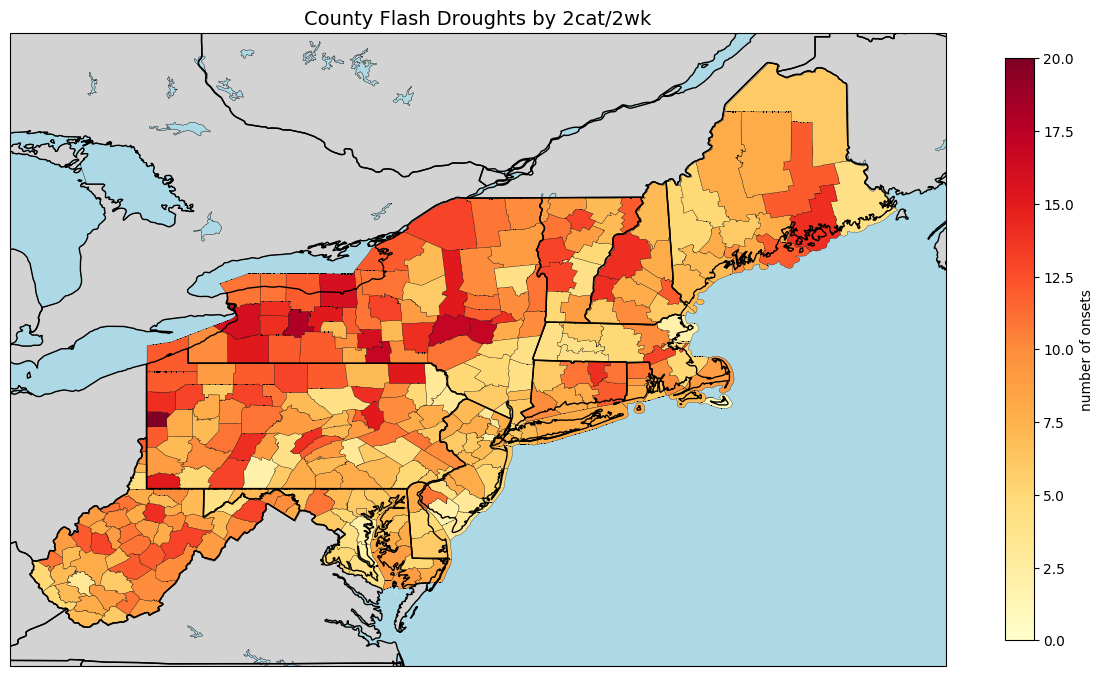

In [58]:
value_col = 'num_onsets'

# vmin = df[value_col].min()
# vmax = df[value_col].max()
vmin = 0
vmax = df[value_col].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('YlOrRd', 256)

fig, ax = plt.subplots(figsize=(12, 10),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())


for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp, None)
    if not state_abbr:
        continue

    key = f"{county_name}_{state_abbr}"
    geom = shape(rec.shape.__geo_interface__)

    if key in df['county_state'].values:
        value = df.loc[df['county_state'] == key, value_col].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'

    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black', linewidth=0.2)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label= 'number of onsets', shrink=0.6)


ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black', linewidth=0.3, zorder=1)
ax.add_feature(cfeature.STATES, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='none')

plt.title(f"County Flash Droughts by 2cat/2wk", fontsize=14)
plt.tight_layout()
plt.show()

In [59]:



month_col = 'most_common_month'

def parse_month_list(x):
    if isinstance(x, str):
        try:
            return [m.strip().lower() for m in ast.literal_eval(x)]
        except Exception:
            return []
    elif isinstance(x, list):
        return [m.strip().lower() for m in x]
    else:
        return []

df['month_list'] = df[month_col].fillna("[]").apply(parse_month_list)

# Only animate these months
months = ['march', 'april', 'may', 'june', 'july', 'august', 'september', 'october']
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())
# Extract geometry + matching key
geoms = []
for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp, None)
    if not state_abbr:
        continue
    key = f"{county_name}_{state_abbr}"
    geom = shape(rec.shape.__geo_interface__)
    geoms.append((key, geom))


# Month label
month_text = ax.text(-82, 47, "", fontsize=18, weight='bold', color='black',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
# month_text.set_text(month.capitalize())

# === Set up figure ===
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black', linewidth=0.3, zorder=1)
ax.add_feature(cfeature.STATES, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='none')


fig.suptitle(month_col, fontsize=20, weight='bold')

# Month label (top left)
month_text = ax.text(-82, 47, "", fontsize=18, weight='bold', color='navy',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# === Update function ===
def update(frame):
    # Clear only geometries, not other features
    for coll in list(ax.collections):
        coll.remove()
    
    month = months[frame]
    month_text.set_text(month.capitalize())

    for key, geom in geoms:
        if key in df['county_state'].values:
            row = df.loc[df['county_state'] == key]
            month_list = row['month_list'].values[0]
            highlight = month.lower() in month_list
        else:
            highlight = False

        ax.add_geometries(
            [geom],
            crs=ccrs.PlateCarree(),
            facecolor='darkgreen' if highlight else 'whitesmoke',
            edgecolor='black',
            linewidth=0.3
        )

# === Animate ===
anim = FuncAnimation(fig, update, frames=len(months), interval=1000, repeat=True)
safe_name = re.sub(r'[^\w\-_.]', '_', month_col)  # replaces anything not alphanumeric, -, _, . with "_"

# Save using the sanitized name
anim.save(f"{safe_name}.mp4", writer="ffmpeg", fps=1)

# Save the animation
# gif_path = "/Users/adriennekirk/Desktop/flash_drought_months.gif"
# anim.save(gif_path, writer=PillowWriter(fps=1))

# print(f"GIF saved to: {gif_path}")
# Image(filename=gif_path)

KeyError: 'most_common_month'

In [189]:
df.head(25)

,State,County,num_onsets,most_common_month,county_state,month_num
0,ct,fairfield,18,October,fairfield_ct,10
1,ct,hartford,15,September,hartford_ct,9
2,ct,litchfield,18,September,litchfield_ct,9
3,ct,middlesex,26,September,middlesex_ct,9
4,ct,new haven,21,September,new haven_ct,9
5,ct,new london,28,September,new london_ct,9
6,ct,tolland,16,September,tolland_ct,9
7,ct,windham,14,September,windham_ct,9
8,dc,district of columbia,11,May,district of columbia_dc,5
9,de,kent,12,September,kent_de,9


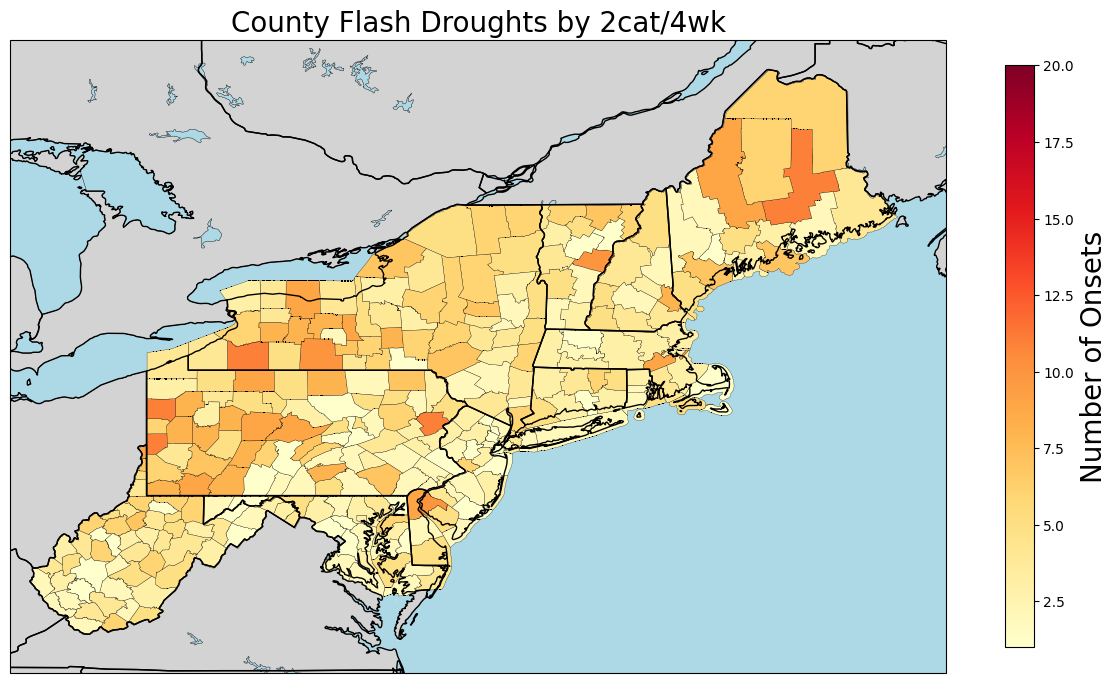

In [67]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import shapefile
from shapely.geometry import shape
import pandas as pd
from matplotlib.animation import FuncAnimation,  PillowWriter
import ast
from IPython.display import HTML 
from IPython.display import Image
import re
# Read shapefile
sf = shapefile.Reader("/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp")
records = sf.shapeRecords()
df = onset_4wks_full
# Strip spaces and lowercase for clean matching
df['County'] = df['County'].str.lower().str.strip()
df['State'] = df['State'].str.lower().str.strip()

# Add combined key for matching
df['county_state'] = df['County'] + '_' + df['State']

statefp_to_abbr = {
    '09': 'ct', '23': 'me', '25': 'ma', '33': 'nh', '34': 'nj',
    '36': 'ny', '42': 'pa', '44': 'ri', '50': 'vt', '24': 'md',
    '54': 'wv', '10': 'de'
}
value_col = 'num_onsets'

# vmin = df[value_col].min()
# vmax = df[value_col].max()
vmin = 1
vmax = 20
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('YlOrRd', 256)

fig, ax = plt.subplots(figsize=(12, 10),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())


for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp, None)
    if not state_abbr:
        continue

    key = f"{county_name}_{state_abbr}"
    geom = shape(rec.shape.__geo_interface__)

    if key in df['county_state'].values:
        value = df.loc[df['county_state'] == key, value_col].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'

    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black', linewidth=0.2)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label= 'number of onsets', shrink=0.6)
cbar.set_label('Number of Onsets', size=20) 


ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black', linewidth=0.3, zorder=1)
ax.add_feature(cfeature.STATES, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='none')

plt.title(f"County Flash Droughts by 2cat/4wk", fontsize=20)
plt.tight_layout()
plt.show()

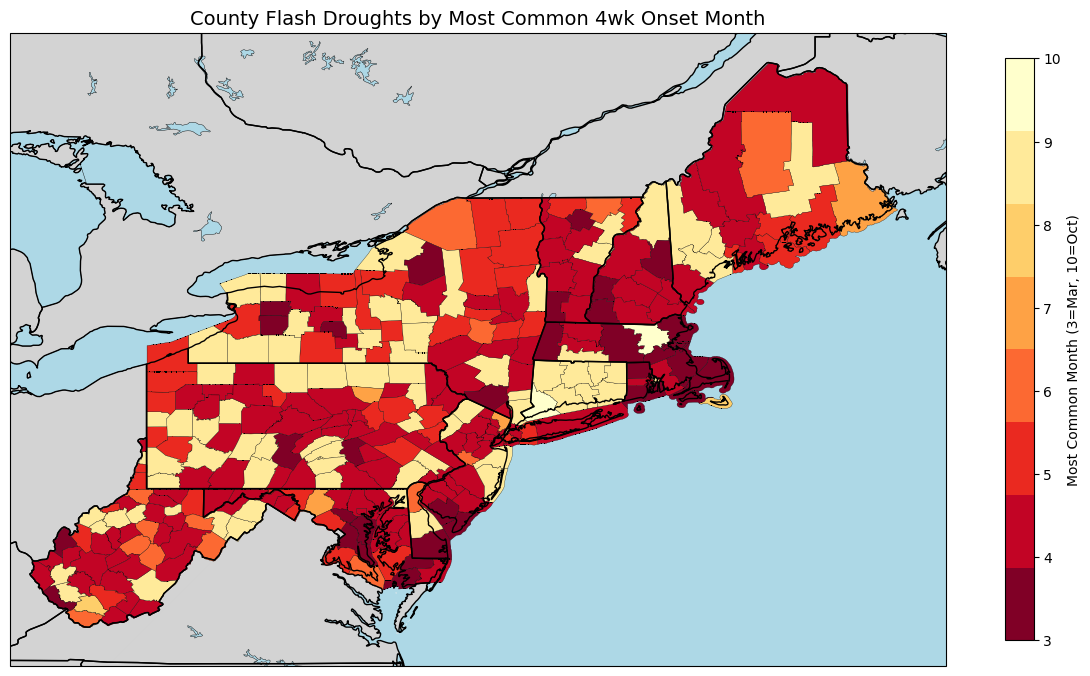

In [184]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import shape
# Mapping month names to numbers
month_to_num = {
    'March': 3,
    'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9,
    'October': 10
}

# Apply mapping to your DataFrame
df['month_num'] = df['most_common_month'].map(month_to_num)

# Set plotting column and normalization
value_col = 'month_num'
vmin = 3
vmax = 10
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('YlOrRd_r',8)  

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())

for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp, None)
    if not state_abbr:
        continue

    key = f"{county_name}_{state_abbr}"
    geom = shape(rec.shape.__geo_interface__)

    if key in df['county_state'].values:
        value = df.loc[df['county_state'] == key, value_col].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'

    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black', linewidth=0.2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, ticks=range(1, 13), label='Most Common Month (3=Mar, 10=Oct)', shrink=0.6)

ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black', linewidth=0.3, zorder=1)
ax.add_feature(cfeature.STATES, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='none')

plt.title("County Flash Droughts by Most Common 4wk Onset Month", fontsize=14)
plt.tight_layout()
plt.show()

In [185]:
df.head(25)

,State,County,num_onsets,most_common_month,county_state,month_num
0,ct,fairfield,20,October,fairfield_ct,10
1,ct,hartford,21,September,hartford_ct,9
2,ct,litchfield,25,September,litchfield_ct,9
3,ct,middlesex,22,September,middlesex_ct,9
4,ct,new haven,23,September,new haven_ct,9
5,ct,new london,23,September,new london_ct,9
6,ct,tolland,19,September,tolland_ct,9
7,ct,windham,20,September,windham_ct,9
8,dc,district of columbia,16,May,district of columbia_dc,5
9,de,kent,14,September,kent_de,9


In [40]:
county_list = ['addison_vt', 'albany_ny', 'berks_pa', 'bradford_pa', 'broome_ny', 'cabell_wv', 'caledonia_vt', 'chenango_ny', 'chester_pa', 'chittenden_vt', 'clearfield_pa', 'columbia_ny', 'columbia_pa', 'cortland_ny', 'dauphin_pa', 'delaware_ny', 'doddridge_wv', 'essex_ny', 'essex_vt', 'franklin_ma', 'franklin_me', 'franklin_vt', 'fulton_ny', 'greene_ny', 'hamilton_ny', 'hancock_me', 'herkimer_ny', 'jackson_wv', 'juniata_pa', 'kanawha_wv', 'knox_me', 'lackawanna_pa', 'lancaster_pa', 'lebanon_pa', 'lincoln_wv', 'luzerne_pa', 'madison_ny', 'mason_wv', 'mcdowell_wv', 'montgomery_ny', 'northumberland_pa', 'oneida_ny', 'orange_ny', 'orange_vt', 'orleans_vt', 'otsego_ny', 'oxford_me', 'penobscot_me', 'perry_pa', 'pike_pa', 'piscataquis_me', 'rensselaer_ny', 'ritchie_wv', 'rutland_vt', 'saratoga_ny', 'schenectady_ny', 'schoharie_ny', 'schuylkill_pa', 'snyder_pa', 'somerset_me', 'sullivan_ny', 'sullivan_pa', 'susquehanna_pa', 'sussex_nj', 'tioga_ny', 'tompkins_ny', 'ulster_ny', 'union_pa', 'waldo_me', 'warren_ny', 'washington_me', 'washington_ny', 'washington_vt', 'wayne_pa', 'westchester_ny', 'wetzel_wv', 'windsor_vt', 'wyoming_pa', 'york_pa']
county_state_df = pd.DataFrame(county_list, columns=['county_state'])
county_state_df[['County', 'State']] = county_state_df['county_state'].str.split('_', expand=True)
county_state_df['County'] = county_state_df['County'].str.title()
county_state_df['State'] = county_state_df['State'].str.upper()

In [52]:
dsci = pd.read_csv('DSCI.csv')

dsci['Date'] = pd.to_datetime(dsci['Date'], format='%Y%m%d')
dsci = dsci[(dsci['Date'] >= '2002-03-01') & (dsci['Date'] <= '2024-10-31')]
dsci = dsci[(dsci['Date'].dt.month >= 3) & (dsci['Date'].dt.month <= 10)]
# corrections = {"saint mary's": "st. mary's", 'saint lawrence': 'st. lawrence'}
# dsci['County'] = dsci['County'].str.lower().str.strip()
# dsci['County'] = dsci['County'].replace(corrections)
dsci.drop(dsci[dsci['State'] == 'VA'].index, inplace=True)
filtered_onsets = []

grouped = dsci.groupby(['State', 'County'])

for (state, county), group in grouped:
    group = group.sort_values('Date').reset_index(drop=True)
    last_kept_date = None
    
    for i, row in group.iterrows():
        current_date = row['Date']
        
        if last_kept_date is None or (current_date - last_kept_date) >= timedelta(weeks=4):
            filtered_onsets.append(row)
            last_kept_date = current_date

filtered_df = pd.DataFrame(filtered_onsets)
onset_dsci = filtered_df.groupby(['State', 'County']).size().reset_index(name='num_onsets')
onset_dsci['County'] = onset_dsci['County'].str.title()
onset_dsci['State'] = onset_dsci['State'].str.upper()
onset_dsci_full = county_state_df.merge(onset_dsci, on=['State', 'County'], how='left')
onset_dsci_full['num_onsets'] = onset_dsci_full['num_onsets'].fillna(0).astype(int)
county_state_df = pd.DataFrame(county_list, columns=['county_state'])
county_state_df[['County', 'State']] = county_state_df['county_state'].str.split('_', expand=True)
county_state_df['County'] = county_state_df['County'].str.title()
county_state_df['State'] = county_state_df['State'].str.upper()

# Combine with the counties from the existing onset_dsci
existing = onset_dsci[['State', 'County']].drop_duplicates()
all_counties = pd.concat([existing, county_state_df[['State', 'County']]], ignore_index=True).drop_duplicates()

# Merge to get full dataset with all counties
onset_dsci_full = all_counties.merge(onset_dsci, on=['State', 'County'], how='left')
onset_dsci_full['num_onsets'] = onset_dsci_full['num_onsets'].fillna(0).astype(int)
len(dsci)

614

In [46]:
# corrections = {
#     "saint mary's": "st.mary's",
#     'saint lawrence': 'st. lawrence',
#     'la salle': 'lasalle',
#     # Add more as needed
# }

# dsci['County'] = dsci['County'].replace(corrections)
def clean_county_state(df):
    # Lowercase, strip, remove suffixes like 'county', 'parish', 'city'
    df = df.copy()
    df['County'] = (
        df['County']
        .str.lower()
        .str.strip()
        .str.replace(r'\s+(county|parish|city)$', '', regex=True)
    )
    df['State'] = df['State'].str.lower().str.strip()
    df['county_state'] = df['County'] + '_' + df['State']
    return df

# Clean both DataFrames
dsci_clean = clean_county_state(onset_dsci_full)
# twowks_clean = clean_county_state(onset_2wks)

# # Find counties in onset_dsci not in onset_2wks
# only_in_dsci = set(dsci_clean['county_state']) - set(twowks_clean['county_state'])

# # Find counties in onset_2wks not in onset_dsci
# only_in_2wks = set(twowks_clean['county_state']) - set(dsci_clean['county_state'])

# print(f"Counties only in onset_dsci ({len(only_in_dsci)}):")
# print(sorted(only_in_dsci))

# print(f"\nCounties only in onset_2wks ({len(only_in_2wks)}):")
# print(sorted(only_in_2wks))
len(dsci_clean)

300

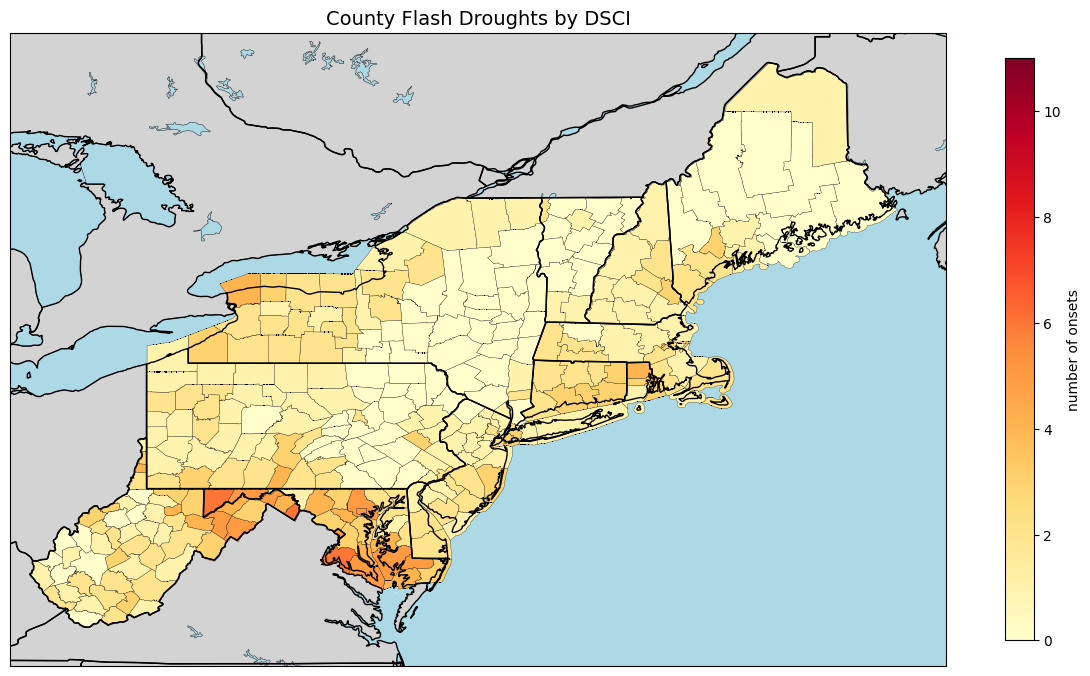

In [49]:
df = onset_dsci_full
# county_list = onset_2wks['County'].str.lower().str.strip().unique()
# Strip spaces and lowercase for clean matching
df['County'] = df['County'].str.lower().str.strip()
df['County'] = (
    df['County']
    .str.lower()
    .str.replace(r'\s+(county|parish|city)$', '', regex=True)
    .str.strip()
)
# df = df[df['County'].isin(county_list)]
df['State'] = df['State'].str.lower().str.strip()

# Add combined key for matching
df['county_state'] = df['County'] + '_' + df['State']

statefp_to_abbr = {
    '09': 'ct', '23': 'me', '25': 'ma', '33': 'nh', '34': 'nj',
    '36': 'ny', '42': 'pa', '44': 'ri', '50': 'vt', '24': 'md',
    '54': 'wv', '10': 'de', '11': 'dc'
}
value_col = 'num_onsets'

# vmin = df[value_col].min()
# vmax = df[value_col].max()
vmin = 0
vmax = 11
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('YlOrRd', 256)

fig, ax = plt.subplots(figsize=(12, 10),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())


for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp, None)
    if not state_abbr:
        continue

    key = f"{county_name}_{state_abbr}"
    geom = shape(rec.shape.__geo_interface__)

    if key in df['county_state'].values:
        value = df.loc[df['county_state'] == key, value_col].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'

    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black', linewidth=0.2)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='number of onsets', shrink=0.6)


ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black', linewidth=0.3, zorder=1)
ax.add_feature(cfeature.STATES, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='none')

plt.title(f"County Flash Droughts by DSCI", fontsize=14)
plt.tight_layout()
plt.show()